# Text Conversion and EDA

### Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Load Data

In [2]:
posts = pd.read_csv('data/cl_aug_sports_posts.csv')

In [3]:
posts

,title,title_len,subreddit,score,created_utc,age,has_authtext,has_linktext,num_comments
0,Serena Williams’s Once-In-A-Lifetime Serve,42,sports,1,1.661814e+09,420116.161326,1,1,0
1,"Wholesome moment, ""Ichiro Girl"" throws out fir...",98,sports,1413,1.661797e+09,436886.161326,0,1,50
2,Williams' goodbye &amp; Raducanu's defence top...,59,sports,5,1.661797e+09,437390.161326,0,1,1
3,Duke volleyball player: BYU slow to act on slurs,48,sports,4962,1.661787e+09,447296.161326,1,1,703
4,[ESPN] Washington Commanders RB Brian Robinson...,139,sports,55,1.661743e+09,490948.161326,1,1,5
...,...,...,...,...,...,...,...,...,...
18473,First set of clubs,18,golf,2,1.661813e+09,422496.561974,0,1,6
18474,"Bought a used set of stealths off 2nd swing, o...",114,golf,77,1.661812e+09,423590.561974,0,1,20
18475,New Taylormade irons release?,29,golf,0,1.661812e+09,423744.561974,0,1,1
18476,How do you breath during your swing?,36,golf,4,1.661812e+09,423974.561974,0,0,20


In [4]:
# determined in other work that column named 'subreddit' is a problem because this word appears in titles
# renaming 'subreddit' to 'subred'
posts.rename(columns={'subreddit': 'subred'}, inplace=True)

### Text EDA with CountVectorizer

In [5]:
cvec = CountVectorizer(stop_words='english')
text = cvec.fit_transform(posts['title'])

In [6]:
cvec_df = pd.DataFrame(text.todense(), columns=cvec.get_feature_names_out())

In [7]:
cvec_df

,00,000,000km,000m,000th,000usd,001,001sec,004,009,...,𝐜𝐚𝐭𝐜𝐡,𝐨𝐧,𝐭𝐡𝐞,𝒕𝒂𝒓𝒈𝒆𝒕𝒆𝒅,𝗝𝗨𝗦𝗧,𝗦𝗜𝗚𝗡𝗘𝗗,𝘽𝙇𝙊𝙊𝘿𝙎,𝙉𝙀𝙒,𝙋𝙍𝙀𝙎𝙀𝙉𝙏𝙎,𝟐𝟎𝟐𝟐
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# throws error:
# cvec_df['on'].sum()

Above df appears to include columns for stop_words in Google Colab, but doesn't actually. Unclear why Colab is still displaying columns for these words.

In [9]:
# check popular word
cvec_df['goal'].sum()

101

In [10]:
# combine text features with original columns
full_cvec_df = pd.concat([posts.drop(columns='title'), cvec_df], axis=1)

In [11]:
full_cvec_df

,title_len,subred,score,created_utc,age,has_authtext,has_linktext,num_comments,00,000,...,𝐜𝐚𝐭𝐜𝐡,𝐨𝐧,𝐭𝐡𝐞,𝒕𝒂𝒓𝒈𝒆𝒕𝒆𝒅,𝗝𝗨𝗦𝗧,𝗦𝗜𝗚𝗡𝗘𝗗,𝘽𝙇𝙊𝙊𝘿𝙎,𝙉𝙀𝙒,𝙋𝙍𝙀𝙎𝙀𝙉𝙏𝙎,𝟐𝟎𝟐𝟐
0,42,sports,1,1.661814e+09,420116.161326,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,98,sports,1413,1.661797e+09,436886.161326,0,1,50,0,0,...,0,0,0,0,0,0,0,0,0,0
2,59,sports,5,1.661797e+09,437390.161326,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,48,sports,4962,1.661787e+09,447296.161326,1,1,703,0,0,...,0,0,0,0,0,0,0,0,0,0
4,139,sports,55,1.661743e+09,490948.161326,1,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18473,18,golf,2,1.661813e+09,422496.561974,0,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0
18474,114,golf,77,1.661812e+09,423590.561974,0,1,20,0,0,...,0,0,0,0,0,0,0,0,0,0
18475,29,golf,0,1.661812e+09,423744.561974,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18476,36,golf,4,1.661812e+09,423974.561974,0,0,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# overall popular words
cvec_df.sum().sort_values(ascending=False)[:25]

vs            1082
2022          1061
game           782
thread         761
season         668
new            630
team           612
time           536
year           503
amp            484
best           475
fight          400
open           397
just           393
today          390
day            385
race           334
player         334
discussion     328
good           324
players        322
august         300
week           298
world          289
ufc            289
dtype: int64

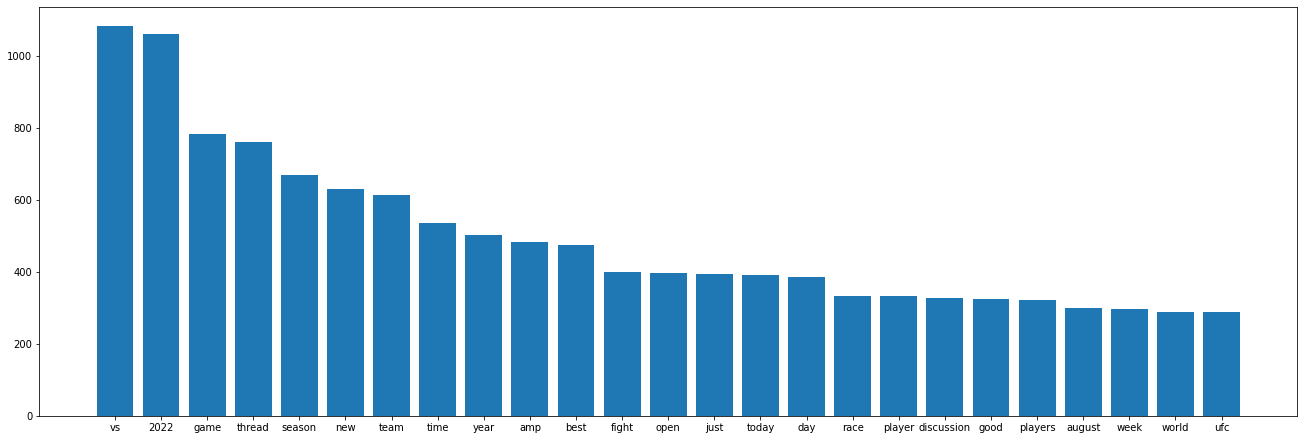

In [14]:
# visualize overall popular words
fig, ax = plt.subplots(figsize=(18,6), constrained_layout=True)

ax.bar(x=cvec_df.sum().sort_values(ascending=False)[:25].index, height=cvec_df.sum().sort_values(ascending=False)[:25]);

Words describing the content of the post, such as 'vs', 'game', and 'team', are common, as are words describing the nature of the post, such as 'thread' and 'discussion'. We also see a lot of time-related words, such as '2022', 'august', 'season', 'time', 'year', 'today', 'day', and 'week'. So, people frequently create posts to discuss current sporting events, perhaps placed within a larger context, such as the current year or season.

In [15]:
# define df with just subreddit and vectorized text columns
subs_cvec_df = full_cvec_df.drop(columns=['title_len', 'score', 'created_utc', 'age', 'has_authtext',
                           'has_linktext', 'num_comments'])

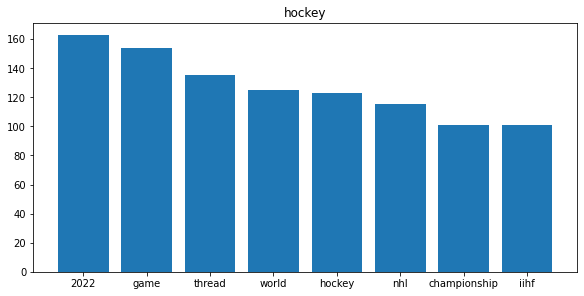

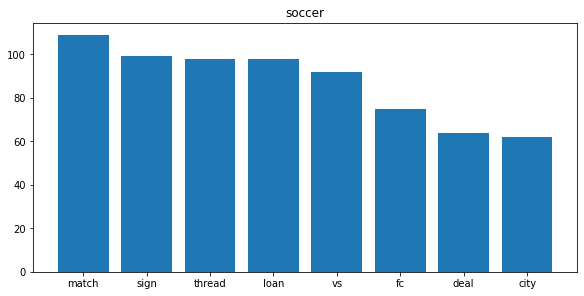

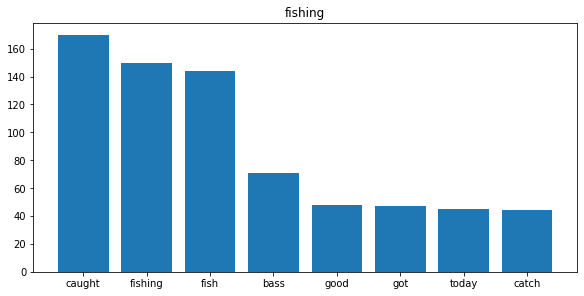

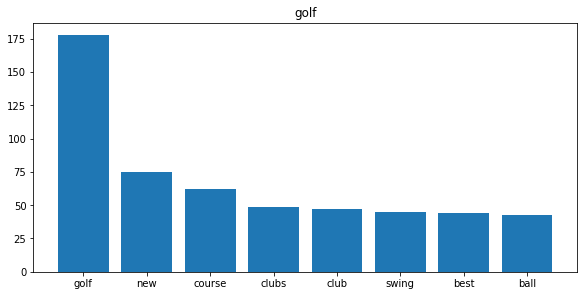

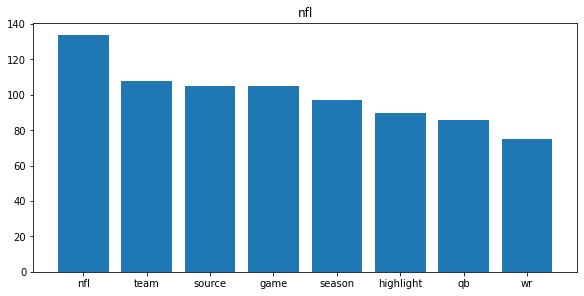

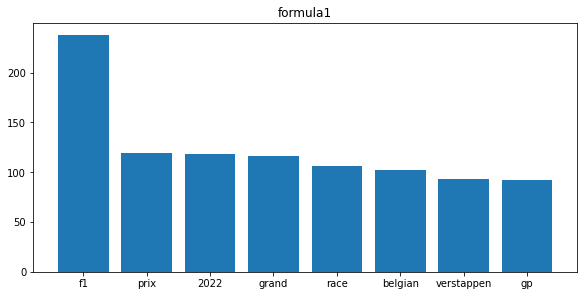

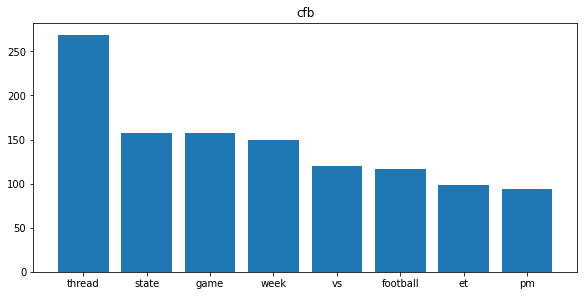

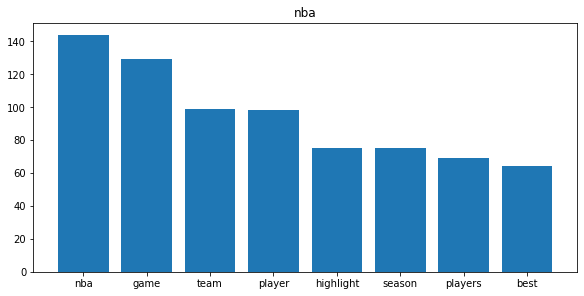

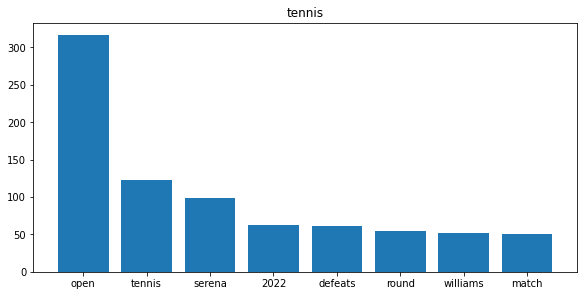

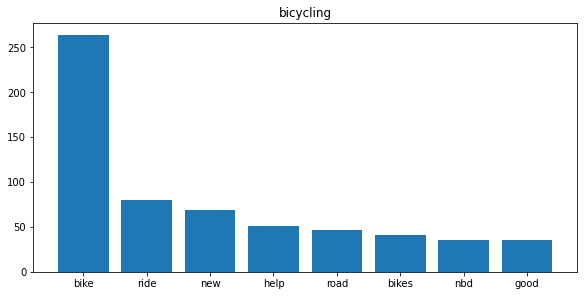

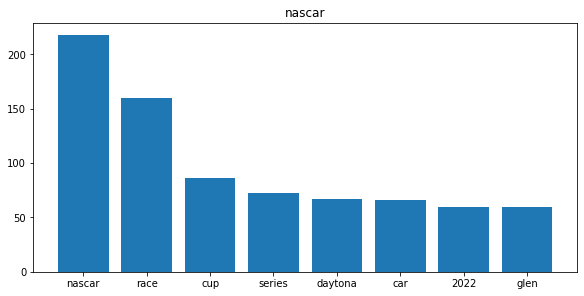

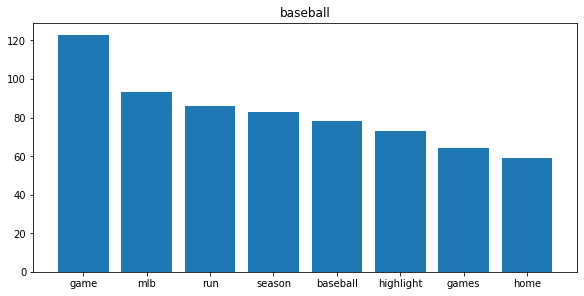

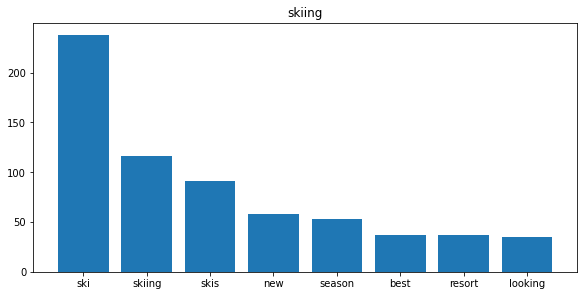

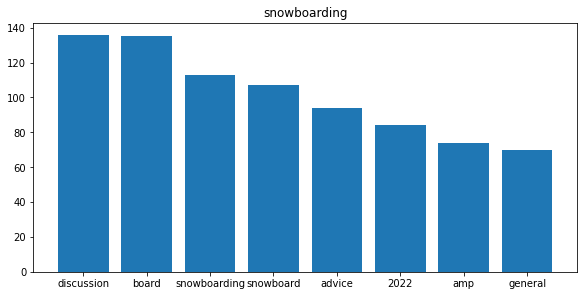

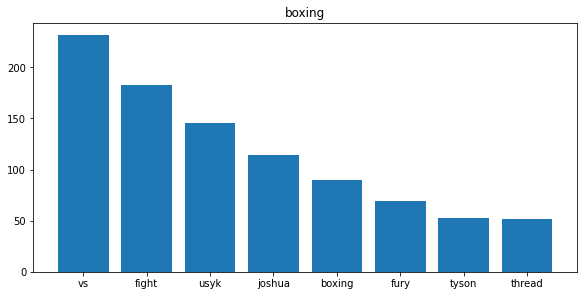

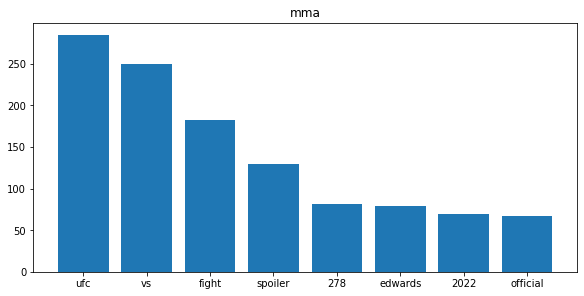

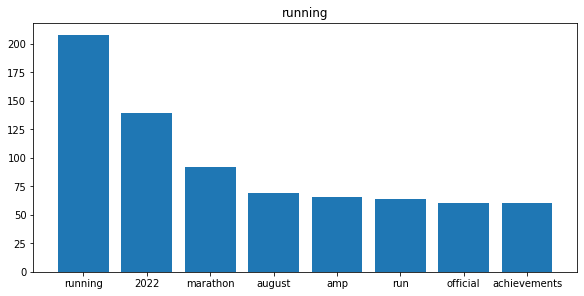

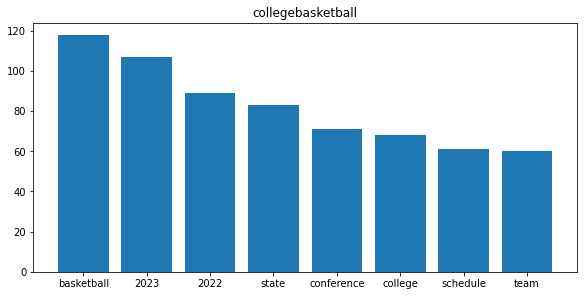

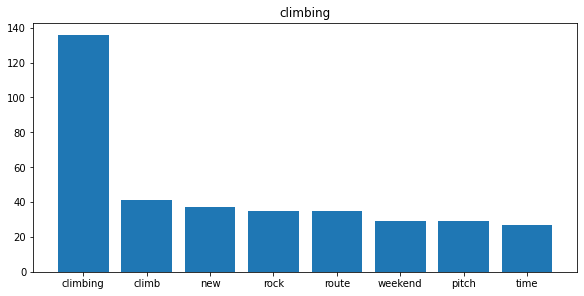

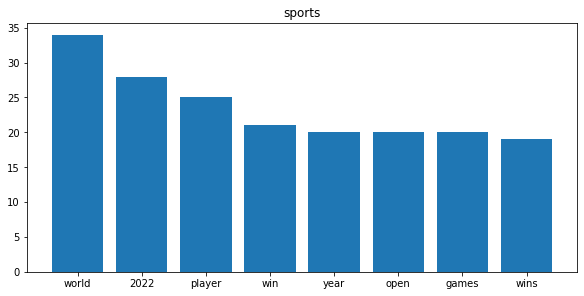

In [19]:
# most popular words by subreddit
for sub in subs_cvec_df['subred'].value_counts(ascending=False).index:
    fig, ax = plt.subplots(figsize=(8,4), constrained_layout=True)

    ax.bar(x=subs_cvec_df[subs_cvec_df['subred'] == sub].drop(columns='subred').sum().sort_values(ascending=False)[:8].index,
           height=subs_cvec_df[subs_cvec_df['subred'] == sub].drop(columns='subred').sum().sort_values(ascending=False)[:8])
    ax.set_title(sub);

Subreddit-specific popular word categories:
- Hockey: game, championship: competition words
- Soccer: sign, loan: transfer words
- Fishing: caught, catch: specific words
- Golf: new, clubs, club, ball: review words
- NFL: competition words; 'source': news word
- F1: competition words; 'belgian and 'verstappen': (Max Verstappen is a Belgian racer)
- CFB: competition words
- NBA: competition words
- Tennis: competition words; 'serena' and 'williams': (Serena playing last tournament)
- Bicycling: new, help, good: reviews and maybe troubleshooting/repair
- NASCAR: competition words
- Baseball: competition words
- Skiing: skis, resort: specific words; skis, new, best, looking: review
- Snowboarding: board: specific word; discussion, advice: helping each other improve (community words?)
- Boxing: competition words; usyk, joshua, fury, tyson: player words
- MMA: competition words; edwards: player word
- Running: competition words
- College Basketball: competition words
- Climbing: climb, rock, route, pitch: specific words
- Sports: competition words

Important Word Categories:
- Competition
- Player
- Community (reviews and advice/discussion)

### Text EDA with TFIDF

In [21]:
tf = TfidfVectorizer()
tf_text = tf.fit_transform(posts['title'])

In [23]:
tf_df = pd.DataFrame(tf_text.todense(), columns=tf.get_feature_names_out())

In [24]:
tf_df

,00,000,000km,000m,000th,000usd,001,001sec,004,009,...,𝐜𝐚𝐭𝐜𝐡,𝐨𝐧,𝐭𝐡𝐞,𝒕𝒂𝒓𝒈𝒆𝒕𝒆𝒅,𝗝𝗨𝗦𝗧,𝗦𝗜𝗚𝗡𝗘𝗗,𝘽𝙇𝙊𝙊𝘿𝙎,𝙉𝙀𝙒,𝙋𝙍𝙀𝙎𝙀𝙉𝙏𝙎,𝟐𝟎𝟐𝟐
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
tf_df.sum().sort_values(ascending=False)[:25]

the       711.071232
to        472.686812
in        402.471708
for       374.546597
of        348.743431
and       309.912213
on        303.722538
is        265.005613
2022      220.394433
with      214.379618
this      213.390172
what      206.148579
at        204.418354
my        193.118579
vs        190.301458
you       187.584169
it        180.632820
thread    166.114623
first     151.722114
from      149.941491
are       139.169186
game      136.751634
that      134.568158
new       133.225174
how       128.051658
dtype: float64

Surprisingly, many "stop words" make the list of most important TFIDF words. This might be because these words are common in some subreddits and rare in others, making them appear more important than they actually are, due to semantic differences across subreddits.

In [27]:
stop_tf = TfidfVectorizer(stop_words='english')
stop_tf_text = stop_tf.fit_transform(posts['title'])

In [28]:
stop_tf_df = pd.DataFrame(stop_tf_text.todense(), columns=stop_tf.get_feature_names_out())

In [30]:
stop_tf_df.sum().sort_values(ascending=False)[:25]

2022          228.179808
vs            194.276143
thread        167.991622
game          145.427373
new           143.436314
season        136.902084
team          124.814515
best          123.080639
time          119.140215
amp           103.586485
open          102.882043
discussion    102.059292
year          100.130877
day            95.119167
august         94.731979
today          86.949003
good           86.166599
just           84.265129
bike           83.971572
fight          82.705859
help           80.812149
race           80.289517
running        80.286394
ski            79.117195
player         76.472512
dtype: float64

Word importances from TfidfVectorizer with stop words largely correspond to word counts from CountVectorizer (with stop words), suggesting that the two vectorizations might perform similarly in modeling.

### Finalize Base DF to Use for Modeling

In [31]:
# drop created_utc in favor of age
posts = posts.drop(columns='created_utc')

Changes from beginning of notebook:
- 'subreddit' column renamed 'subred'
- drop created_utc in favor of age

In [33]:
# save to csv
posts.to_csv('data/posts_modelready.csv', index=False)